# Ejemplo regresión con arboles de decisión y random forest
Este ejemplo ha sido construido para la clase de inteligencia artificial IA-2022-I del programa de Ingeniería de Sistemas de la Universidad del Magdalena. El ejemplo ilustra el uso de las clases DecisionTreeRegressor y RandomForestRegressor sobre el conjunto de datos de ejemplos California Housing disponible también en la librería Sickit-Learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.model_selection import train_test_split

%matplotlib inline

Se carga el conjunto de datos California Housing, cuyo objetivo es predecir el valor promedio de una casa con base en 8 características que tienen que ver con el número de habitaciones promedios de la casa, la antiguedad, el ingreso promedio de los habitantes de la casa, la ubicación, etc.

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = pd.DataFrame(data=housing.data, columns=housing.feature_names)
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


In [3]:
y = housing.target
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [4]:
3
.
#Verificando que no haya valores nulos en los ejemplos del conjunto
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

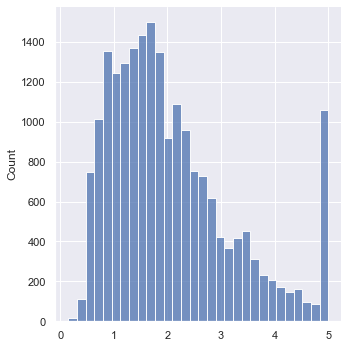

In [5]:
#Distribución de la variable a predecir
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(y, bins=30)
plt.show()

<AxesSubplot:>

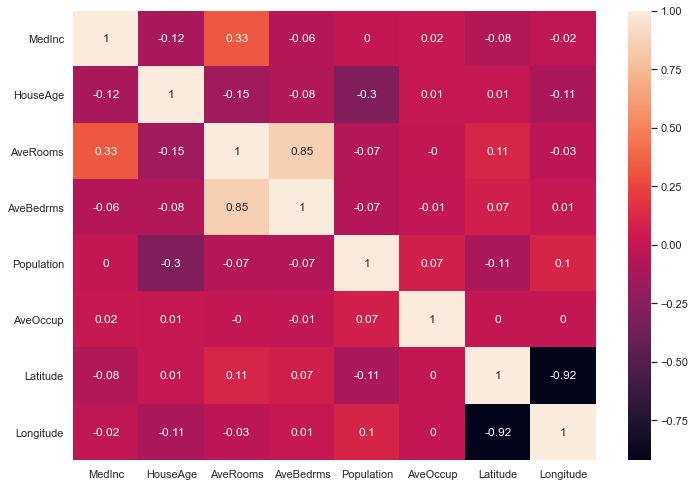

In [6]:
#Matriz de correlación para inspeccionar posibles variables predictoras relacionadas entre sí
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [7]:
#Partición del conjunto de datos en entrenamiento y prueba. Un 30 por ciento de los datos totales se reserva para prueba
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

Se utilizará la clase DecisionTreeRegressor para construir un árbol de decisión que luego se evalúa en el conjunto de datos reservado para prueba

In [8]:
#Funciones requeridas para implementar un arbol de decisión para regresión y las métricas de evaluación
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Entrenamiento del modelo
clf = tree.DecisionTreeRegressor()
clf.fit(Xtrain, Ytrain)

DecisionTreeRegressor()

In [9]:
#Evaluación del modelo entrenado en el conjunto de datos de entrenamiento y prueba
Ytrain_predict = clf.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict)))
r2 = r2_score(Ytrain, Ytrain_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Ytest_predict = clf.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict)))
r2 = r2_score(Ytest, Ytest_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 2.707910814275802e-16
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 0.7414281990993047
R2 score is 0.5903460456886263


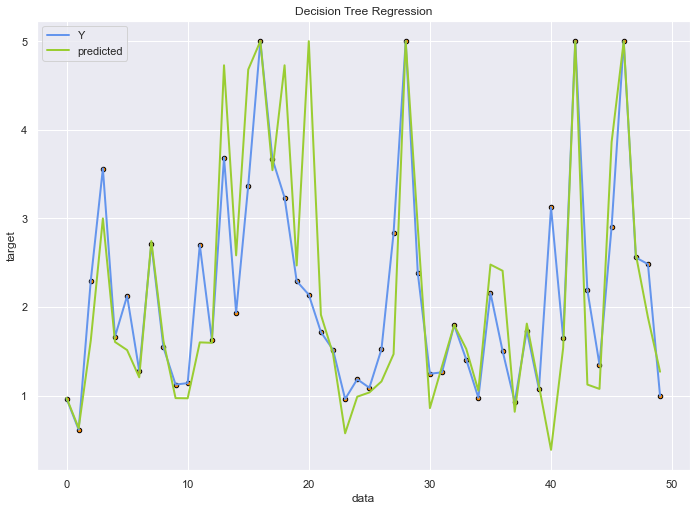

In [18]:
# Plot the results
x =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x, Ytest[:50], s=20, edgecolor="black", c="darkorange")
plt.plot(x, Ytest[:50], color="cornflowerblue", label="Y", linewidth=2)
plt.plot(x, Ytest_predict[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Se utiliza la clase RandomForestRegressor para construir un modelo ensamblado, conformado por varios árboles de decisión, en los resultados se puede ver que el modelo final no queda tan sobreajustado a los datos de entrenamiento, y tiene una mejor evaluación en los datos reservados para la prueba

In [15]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=50, max_depth=20)
regr.fit(Xtrain, Ytrain)


RandomForestRegressor(max_depth=20, n_estimators=50)

In [16]:
Ytrain_predict2 = regr.predict(Xtrain)
rmse = (np.sqrt(mean_squared_error(Ytrain, Ytrain_predict2)))
r2 = r2_score(Ytrain, Ytrain_predict2)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
Ytest_predict2 = regr.predict(Xtest)
rmse = (np.sqrt(mean_squared_error(Ytest, Ytest_predict2)))
r2 = r2_score(Ytest, Ytest_predict2)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.20044111317151886
R2 score is 0.9697238005297418


The model performance for testing set
--------------------------------------
RMSE is 0.519021527616325
R2 score is 0.7992527082127929


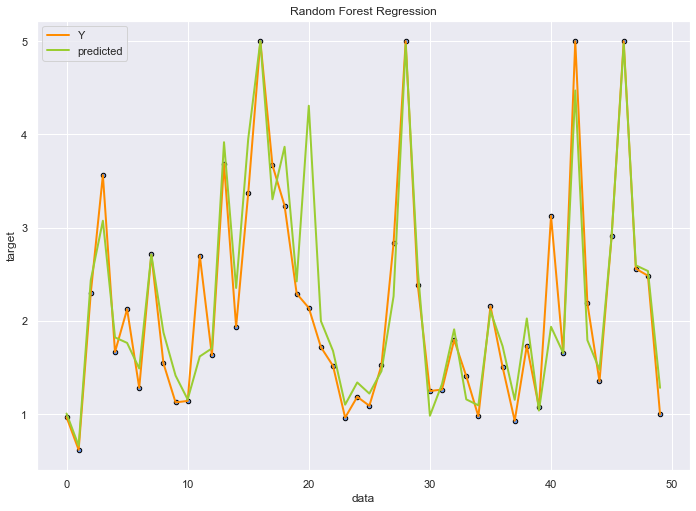

In [17]:
# Plot the results
x =  np.arange(0.0, 50)[:, np.newaxis]
plt.figure()
plt.scatter(x, Ytest[:50], s=20, edgecolor="black", c="cornflowerblue")
plt.plot(x, Ytest[:50], color="darkorange", label="Y", linewidth=2)
plt.plot(x, Ytest_predict2[:50], color="yellowgreen", label="predicted", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Random Forest Regression")
plt.legend()
plt.show()